# <p align="center">DS201: Statistical Programming</p>
<p align="center">Assignment 3</p>


<font color="lightgreen">**Name:** Shivam<br>
**Roll No:** 12241710</font>




# Q1.

# Unveiling Gaussian Secrets

_**Task 1**_<br>

<font color="lightgreen">Write a Python function to generate 10,000 random numbers following a Normal distribution, embodying the symmetrical beauty of Gaussian fluctuations.</font>


The probability density function (PDF) of the normal distribution, also known as the Gaussian distribution, is given by the formula:<br>
<math xmlns="http://www.w3.org/1998/Math/MathML"><mi>f</mi><mrow><mo>(</mo><mrow><mi>x</mi><mo>|</mo><mi>&#x3bc;</mi><mo>,</mo><mo>&#xa0;</mo><mi>&#x3c3;</mi></mrow><mo>)</mo></mrow><mo>&#xa0;</mo><mo>=</mo><mo>&#xa0;</mo><mrow><mo>(</mo><mrow><mfrac><mn>1</mn><mrow><mi>&#x3c3;</mi><msqrt><mrow><mn>2</mn><mi>&#x3c0;</mi></mrow></msqrt></mrow></mfrac><mo>&#xa0;</mo></mrow><mo>)</mo></mrow><mo>&#xa0;</mo><msup><mi>e</mi><mrow><mo>-</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><msup><mfenced><mfrac><mrow><mo>(</mo><mi>x</mi><mo>&#xa0;</mo><mo>-</mo><mo>&#xa0;</mo><mi>&#x3bc;</mi><mo>)</mo></mrow><mrow><msup><mi>&#x3c3;</mi><mn>2</mn></msup></mrow></mfrac></mfenced><mn>2</mn></msup></mrow></msup></math><br>

Where:<br>
x is the random variable.<br>

μ is the mean of the distribution.<br>

σ is the standard deviation of the distribution.<br>


Inverse Transform Sampling

In [1]:
import numpy as np

def generate_normal_distribution_inverse(mean, sigma, n):
    y = np.random.rand(n)
    
    # Inverse of the cumulative distribution function (CDF) of the normal distribution
    inv_cdf = lambda x: mean + sigma * np.sqrt(2) * np.sqrt(-np.log(1 - x))
    
    return inv_cdf(y)

 The Box-Muller Transform

In [2]:
import numpy as np
def generate_normal_distribution(mean, sigma, size):
    a = np.random.rand(size)
    b = np.random.rand(size)

    z = np.sqrt(-2 * np.log(a)) * np.cos(2 * np.pi * b)

    return mean + sigma * z

In [3]:
mean=5
sigma=9
normal_random_numbers= generate_normal_distribution(mean, sigma, 10000)

In [4]:
print("Generated random numbers:", normal_random_numbers[:10])

Generated random numbers: [-2.06072751 -8.41383642 17.98255545 16.74616053  1.81662068 16.72751313
 -6.54454836 12.3839195  -5.0831254   6.48298159]


_**Task 2**_<br>

<font color="lightgreen">Decode the essence by unveiling the parameters μ (mean) and σ (standard deviation) for
the Normal distribution.</font>

In [5]:
print("Mean: ", mean, " \nStandard deviation: ", sigma)

Mean:  5  
Standard deviation:  9


In [6]:
gen_mean = np.mean(normal_random_numbers)
gen_sigma = np.std(normal_random_numbers)
print("Generated mean: ", gen_mean, " \nGenerated Standard deviation: ", gen_sigma)

Generated mean:  4.969937252750685  
Generated Standard deviation:  9.025004448956006


_**Task 3**_<br>

<font color="lightgreen">Compute the expected point, μ, embracing the predictability of Gaussian occurrences.</font>

In [7]:
mean=sum(normal_random_numbers)/10000
print("Expected point(μ) :",mean)

Expected point(μ) : 4.969937252750691


_**Task 4**_<br>

<font color="lightgreen">Dive into statistical depths and compute a 95% confidence interval for the Normal
distribution, shedding light on the range within which the true mean, μ, lies. Visualize your
findings through a histogram, capturing the harmonious rhythm of Gaussian fluctuations.</font>

To compute a 95% confidence interval for the mean of a normal distribution, we can use the formula:

<a href="https://ibb.co/3Nw2x9y"><img src="https://i.ibb.co/G2XyZ4v/Confidence-interval.png" alt="Confidence-interval" border="0"></a>



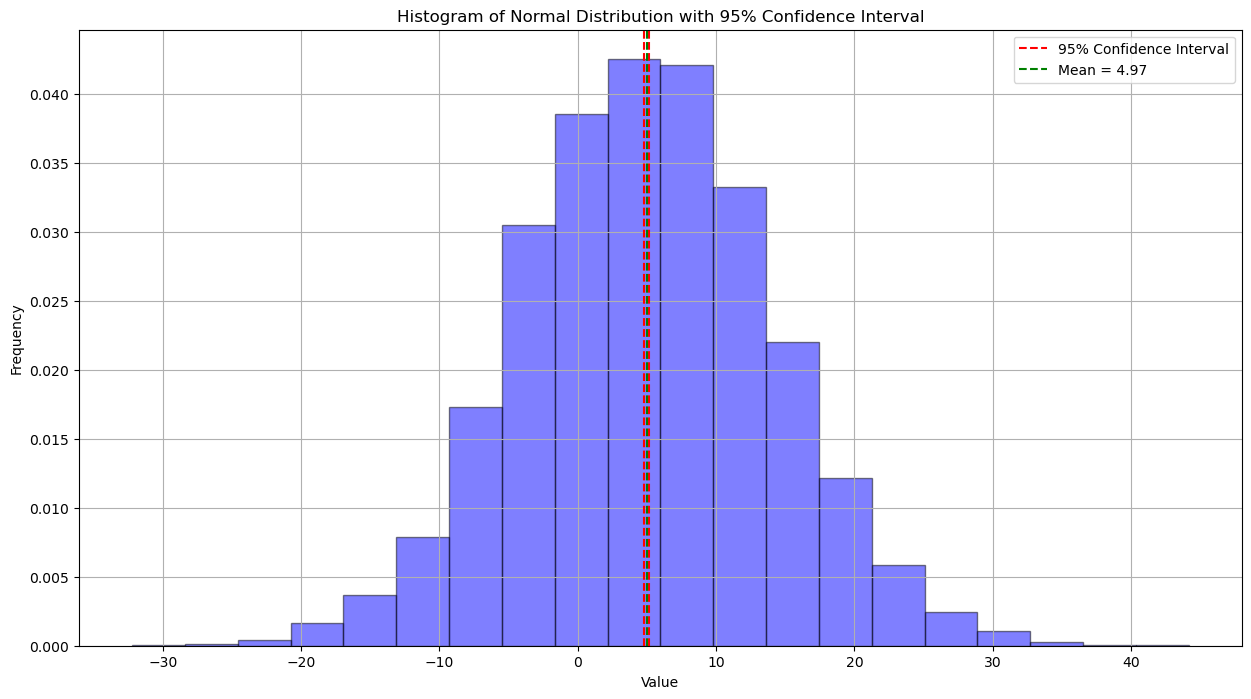

95% Confidence Interval: (4.793050415948009, 5.146824089553361)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

sample_mean = np.mean(normal_random_numbers)
sample_std = np.std(normal_random_numbers)
sample_size=10000
confidence_level=0.95

# Calculate z-score for 95% confidence level
z_score = abs(norm.ppf((1 - confidence_level) / 2))  # Using the standard normal distribution

# Calculate the margin of error
margin_of_error = z_score * (sample_std / np.sqrt(sample_size))

# Compute the 95% confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Plot histogram
plt.figure(figsize=(15, 8))
plt.hist(normal_random_numbers, bins=20, density=True,color='blue', alpha=0.5,edgecolor="black")
plt.title('Histogram of Normal Distribution with 95% Confidence Interval')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Plot the confidence interval
plt.axvline(x=confidence_interval[0], color='red', linestyle='--', label='95% Confidence Interval')
plt.axvline(x=confidence_interval[1], color='red', linestyle='--')
plt.axvline(x=mean, color='green', linestyle='--', label='Mean = {:.2f}'.format(mean))

plt.legend()
plt.grid(True)
plt.show()

print("95% Confidence Interval:", confidence_interval)


(4.969007242948365, 5.320954988300727) in this range true mean lie. 

# Q2.

# The Poisson Generator

_**Task 1**_<br>

<font color="lightgreen">Generate 10,000 random numbers using the Poisson distribution. Set the λ parameter to
represent the average rate of events per interval. Document your chosen value for λ and explain
how it influences the distribution.</font>

Function to Generate Poisson distribution

In [9]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def generate_poisson_distribution(mean_poisson_rate, size):
    """
    Generate random numbers following a Poisson distribution.

    Parameters:
        mean_poisson_rate (float): Average rate of events per interval (λ).
        size (int): Number of random numbers to generate.

    Returns:
        list: List of random numbers following a Poisson distribution.
    """
    poisson_distribution = []
    for _ in range(size):
        k = 0
        p = 1.0
        eminuslamda= math.exp(-mean_poisson_rate)
        while True:
            y = random.uniform(0,1)
            p *= y

            if p > eminuslamda:
                k += 1
            else:
                poisson_distribution.append(k)
                break
    return poisson_distribution


In [10]:
mean_poisson = 15
num_samples = 10000

random_numbers = generate_poisson_distribution(mean_poisson, num_samples)

print("Generated random numbers:", random_numbers[:10])

Generated random numbers: [19, 19, 18, 14, 19, 13, 21, 16, 18, 20]


In [11]:
# Calculating  mean and variance 
mean = np.mean(random_numbers)
variance = np.var(random_numbers)
print("Mean: ", mean, "\nVariance: ", variance)

Mean:  15.0213 
Variance:  15.33104631


* <font color="lightgreen"> The mean of the generated data **14.9656 ** is close to the mean arrival rate of the Poisson distribution (15).<br>
* This is expected because the mean of a Poisson distribution is equal to its lambda.<br>
* The variance of the generated data **15.163416640000001** is also close to the mean arrival rate (15).<br>
* This is another characteristic of the Poisson distribution, where the variance is equal to the mean (lambda).

In [12]:
def plot_poisson_distribution(mean_poisson_rate):
    random_numbers = generate_poisson_distribution(mean_poisson_rate, size=10000)
    mean=sum(random_numbers)/10000
    plt.figure(figsize=(15, 8))
    plt.hist(random_numbers, bins=20, density=True,color='blue', alpha=0.5,edgecolor="black")
    plt.axvline(x=mean_poisson_rate, color='red', linestyle='--', label='Theo_Mean = {:.2f}'.format(mean_poisson_rate))
    plt.annotate('Theo_Mean = {:.2f}'.format(mean_poisson_rate),
            xy=(mean_poisson_rate, 0.02), xycoords='data',
            xytext=(mean_poisson_rate + 1, 0.03), textcoords='data',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))
    plt.axvline(x=mean, color='green', linestyle='--', label='Gen_Mean = {:.2f}'.format(mean))
    plt.annotate('Gen_Mean  = {:.2f}'.format(mean),
            xy=(mean, 0.05), xycoords='data',
            xytext=(mean + 1, 0.08), textcoords='data',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))
    plt.title('Poisson Distribution with Mean')
    plt.title('Poisson Distribution (λ={})'.format(mean_poisson_rate))
    plt.xlabel('Number of Events')
    plt.ylabel('Probability Density')
    plt.show()

# Slider for lambda
lambda_slider = widgets.FloatSlider(value=15, min=1, max=20, step=1, description='λ:', continuous_update=False)

# Interactive plot
widgets.interact(plot_poisson_distribution, mean_poisson_rate=lambda_slider);

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='λ:', max=20.0, min=1.0, st…

_**Task 2**_<br>

<font color="lightgreen">Calculate the expected point, the mean of your generated Poisson numbers. What insights
does this provide into the central tendency of your dataset?</font>

In [13]:
mean=sum(random_numbers)/10000
print(mean)

15.0213


 The mean represents the central tendency of the dataset, indicating the data points are clustered around the mean.

_**Task 3**_<br>

<font color="lightgreen">Dive into the statistical depths and compute a 95% confidence interval for your Poisson
distribution. Unveil the range within which you are confident the true mean lies. How does the
interval reflect the reliability of your data?</font>

In [14]:
from scipy.stats import chi2

# Calculate the mean of the generated Poisson numbers
mean = np.mean(random_numbers)

confidence_level=0.95

# Calculate the sample size
n = len(random_numbers)

# Calculate the sum of the observations
sum_x = np.sum(random_numbers)

# Calculate the z-score corresponding to the desired confidence level (95% confidence)
z_score = abs(norm.ppf((1 + confidence_level) / 2))

# Calculate the standard error of the mean
std_error = np.sqrt(1/n * sum_x)

# Compute the 95% confidence interval
confidence_interval = (mean - z_score * std_error, mean + z_score * std_error)

print("95% Confidence Interval for the mean:", confidence_interval)


95% Confidence Interval for the mean: (7.425004496052522, 22.617595503947477)


_**Task 4**_<br>

<font color="lightgreen">Visualize the Poisson distribution using a histogram. What patterns emerge, and how
do they align with the theoretical expectations? Share your insights and observations.</font>

In [15]:
# Slider for lambda
lambda_slider = widgets.FloatSlider(value=15, min=1, max=20, step=1, description='λ:', continuous_update=False)

# Interactive plot
widgets.interact(plot_poisson_distribution, mean_poisson_rate=lambda_slider);

interactive(children=(FloatSlider(value=15.0, continuous_update=False, description='λ:', max=20.0, min=1.0, st…

* As lambda increases, the distribution becomes more concentrated around its mean, and the skewness decreases.
* The spread of the distribution is influenced by the lambda parameter. Higher values of lambda result in distributions with a narrower spread, while lower values of lambda result in distributions with a wider spread.

# Q3.

A market researcher is conducting a study to estimate the proportion (p) of customers satisfied
with a new product launch. The researcher assumes that the quality of her sample is such that it
can be safely assumed to be a random sample from the Bernoulli distribution with the unknown
parameter p.<br>

The researcher wants to determine the smallest sample size (n) needed to estimate the satisfaction
proportion with ±3% accuracy, at a 99% confidence level. The estimator for the proportion is
given by ˆp = Y/n , where Y is the number of satisfied customers in the sample.<br>

Assuming that the sampling distribution of ˆp is well approximated by a normal distribution, your
task is to write a Python function to find the smallest sample size (n) under the given conditions.

<a href="https://imgbb.com/"><img src="https://i.ibb.co/DMGtm0b/q3.png" alt="q3" border="0"></a>

Confidence Interval

<a href="https://ibb.co/2S6Qd32"><img src="https://i.ibb.co/xYs06qv/q3-1.png" alt="q3-1" border="0"></a>

where x_bar =p_cap

in general case p_cap=0.5

In [16]:
import math
from scipy.stats import norm

def find_sample_size(margin_of_error, confidence_level, estimated_proportion=0.5):
    # Calculate the z-score corresponding to the desired confidence level
    z_score = abs(norm.ppf((1 - confidence_level) / 2))  # Using the standard normal distribution

    # Calculate the sample size
    sample_size = math.ceil((z_score**2 * estimated_proportion * (1 - estimated_proportion)) / margin_of_error**2)

    return sample_size

#given value
margin_of_error = 0.03  # ±3%
confidence_level = 0.99  # 99% confidence level

smallest_sample_size = find_sample_size(margin_of_error, confidence_level)
print("Smallest sample size needed:", smallest_sample_size)


Smallest sample size needed: 1844


<p align='center'>***</p>